In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scanpy as sc

from sciso.plot import *

Set plot style

In [2]:
set_nature_style()

## Panel c

### Set paths

In [3]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220322_AB_DKFZHypoxia") 
anndata_dir = data_dir / "anndata"
adata_am_path =anndata_dir / "hypoxia_adata_am_concat.h5ad"
adata_path = anndata_dir /"hypoxia_adata_concat_fit.h5ad"

# Output
plots_path = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/") / "figure_images" / "fig_02"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [4]:
adata = sc.read_h5ad(adata_path)

### Scatterplot and histograms

/tmp/ipykernel_23777/2785087807.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_separate.obs["Condition, GFP state"] = [f"{cond}, GFP {gfp}" for cond, gfp in zip(adata_separate.obs["condition"], adata_separate.obs["assigned GFP class"])]


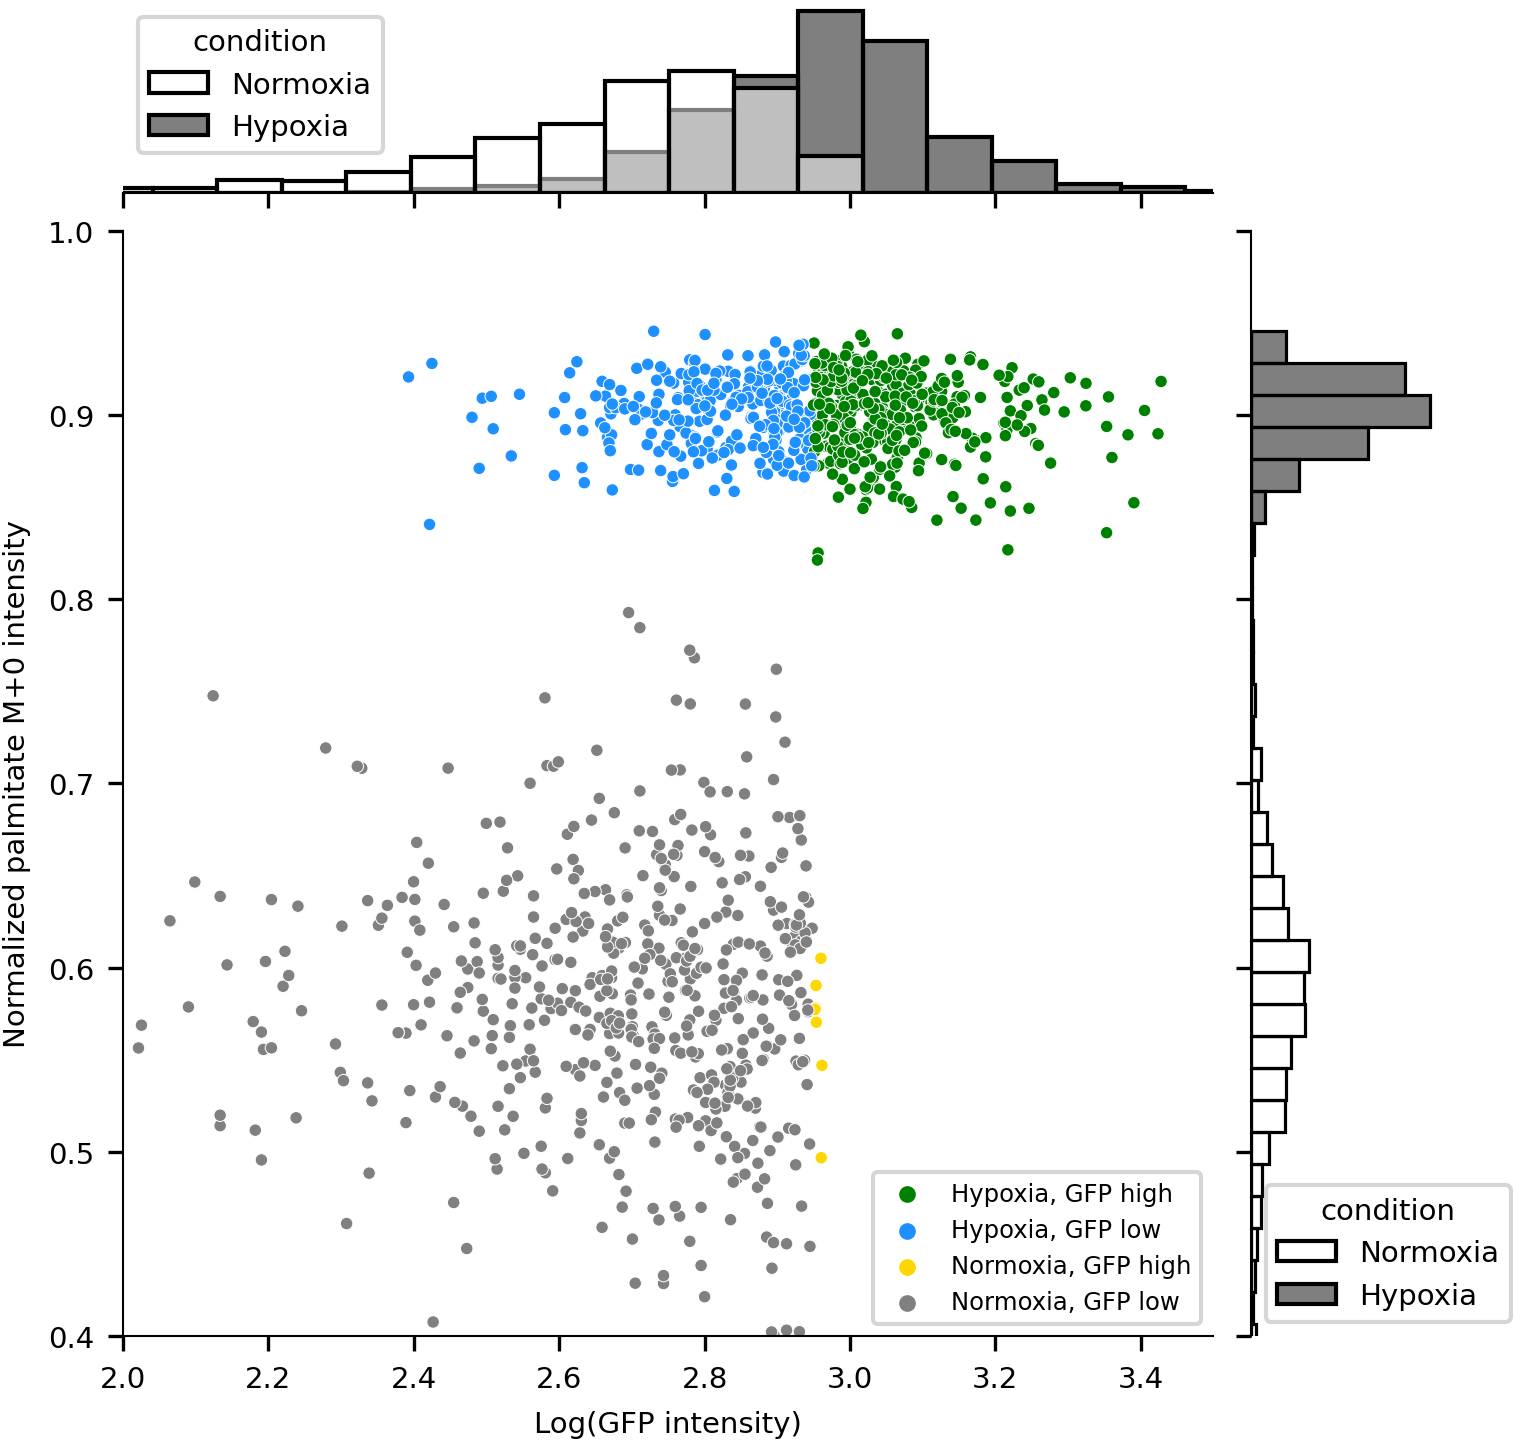

In [5]:
adata_separate =  adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled")]
adata_separate.obs["Condition, GFP state"] = [f"{cond}, GFP {gfp}" for cond, gfp in zip(adata_separate.obs["condition"], adata_separate.obs["assigned GFP class"])]
df = adata_separate[adata_separate.obs.slide == 3].obs
x_col = 'log_gfp'
y_col = 'C16H32O2-H_uptake'

p = sns.JointGrid(data=df, y=y_col, x=x_col, ylim=(0.4, 1), xlim=(2, 3.5), height=5)
p.plot_joint(sns.scatterplot, hue=df["Condition, GFP state"],
             palette=["green", "dodgerblue", "gold", "grey"],
             hue_order=["Hypoxia, GFP high", "Hypoxia, GFP low", "Normoxia, GFP high", "Normoxia, GFP low"])
p.plot_marginals(sns.histplot, bins=40, hue=df["condition"], palette=["white", "black"], hue_order=["Normoxia", "Hypoxia"], legend=True)
p.set_axis_labels("Log(GFP intensity)", "Normalized palmitate M+0 intensity")
p.ax_joint.legend(fontsize="small")
# p.ax_marg_y.legend()
plt.savefig(plots_path / "panel_c.png")
plt.savefig(plots_path / "panel_c.svg")

### Classification accuracy

Accuracy:  1.0


/home/buglakova/anaconda3/envs/sciso_env_rep_final/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


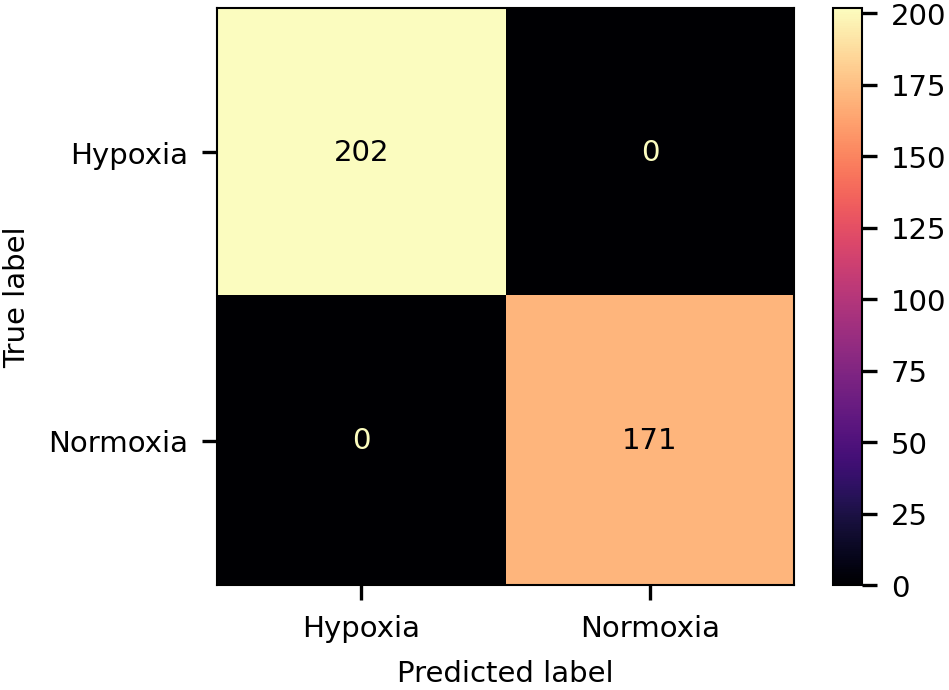

ROC AUC score:  1.0


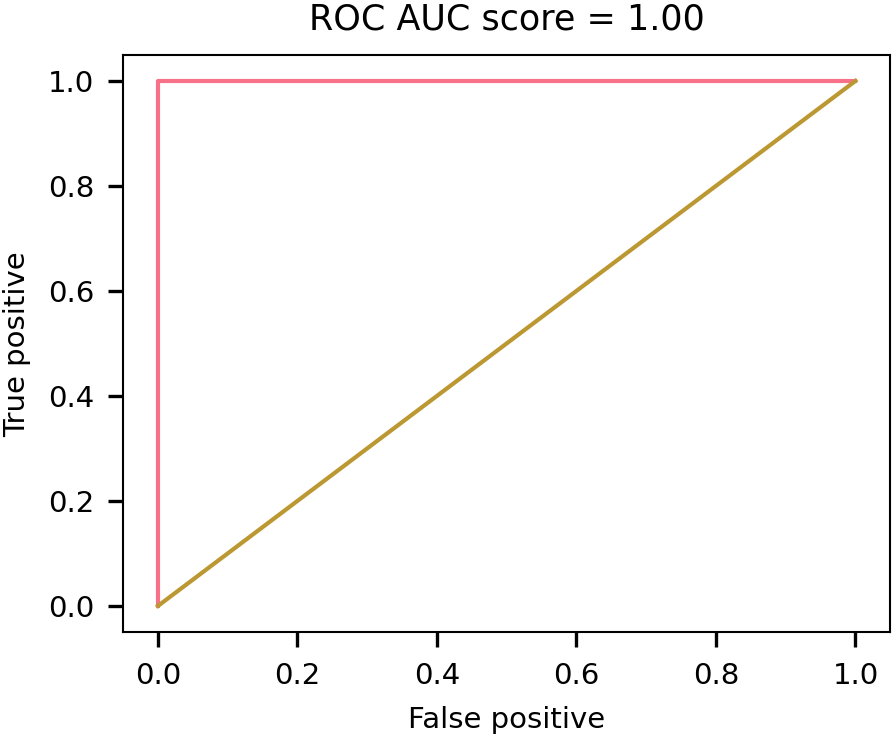

In [6]:
adata_separate =  adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & (adata.obs.slide == 3)]
clf = train_classifier(adata_separate, "separate", "Hypoxia", plots_path, "condition")

## Panel d

### Set paths

In [7]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220322_AB_DKFZHypoxia") 
anndata_dir = data_dir / "anndata"
adata_am_path =anndata_dir / "hypoxia_adata_am_concat.h5ad"
adata_path = anndata_dir /"hypoxia_adata_concat_fit.h5ad"

# Output
plots_path = Path(data_dir / "figure_images" / "fig_02")
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [8]:
adata = sc.read_h5ad(adata_path)

### Mixture (predict class assigned based on fluorescence)
Only show cells from Slide 3

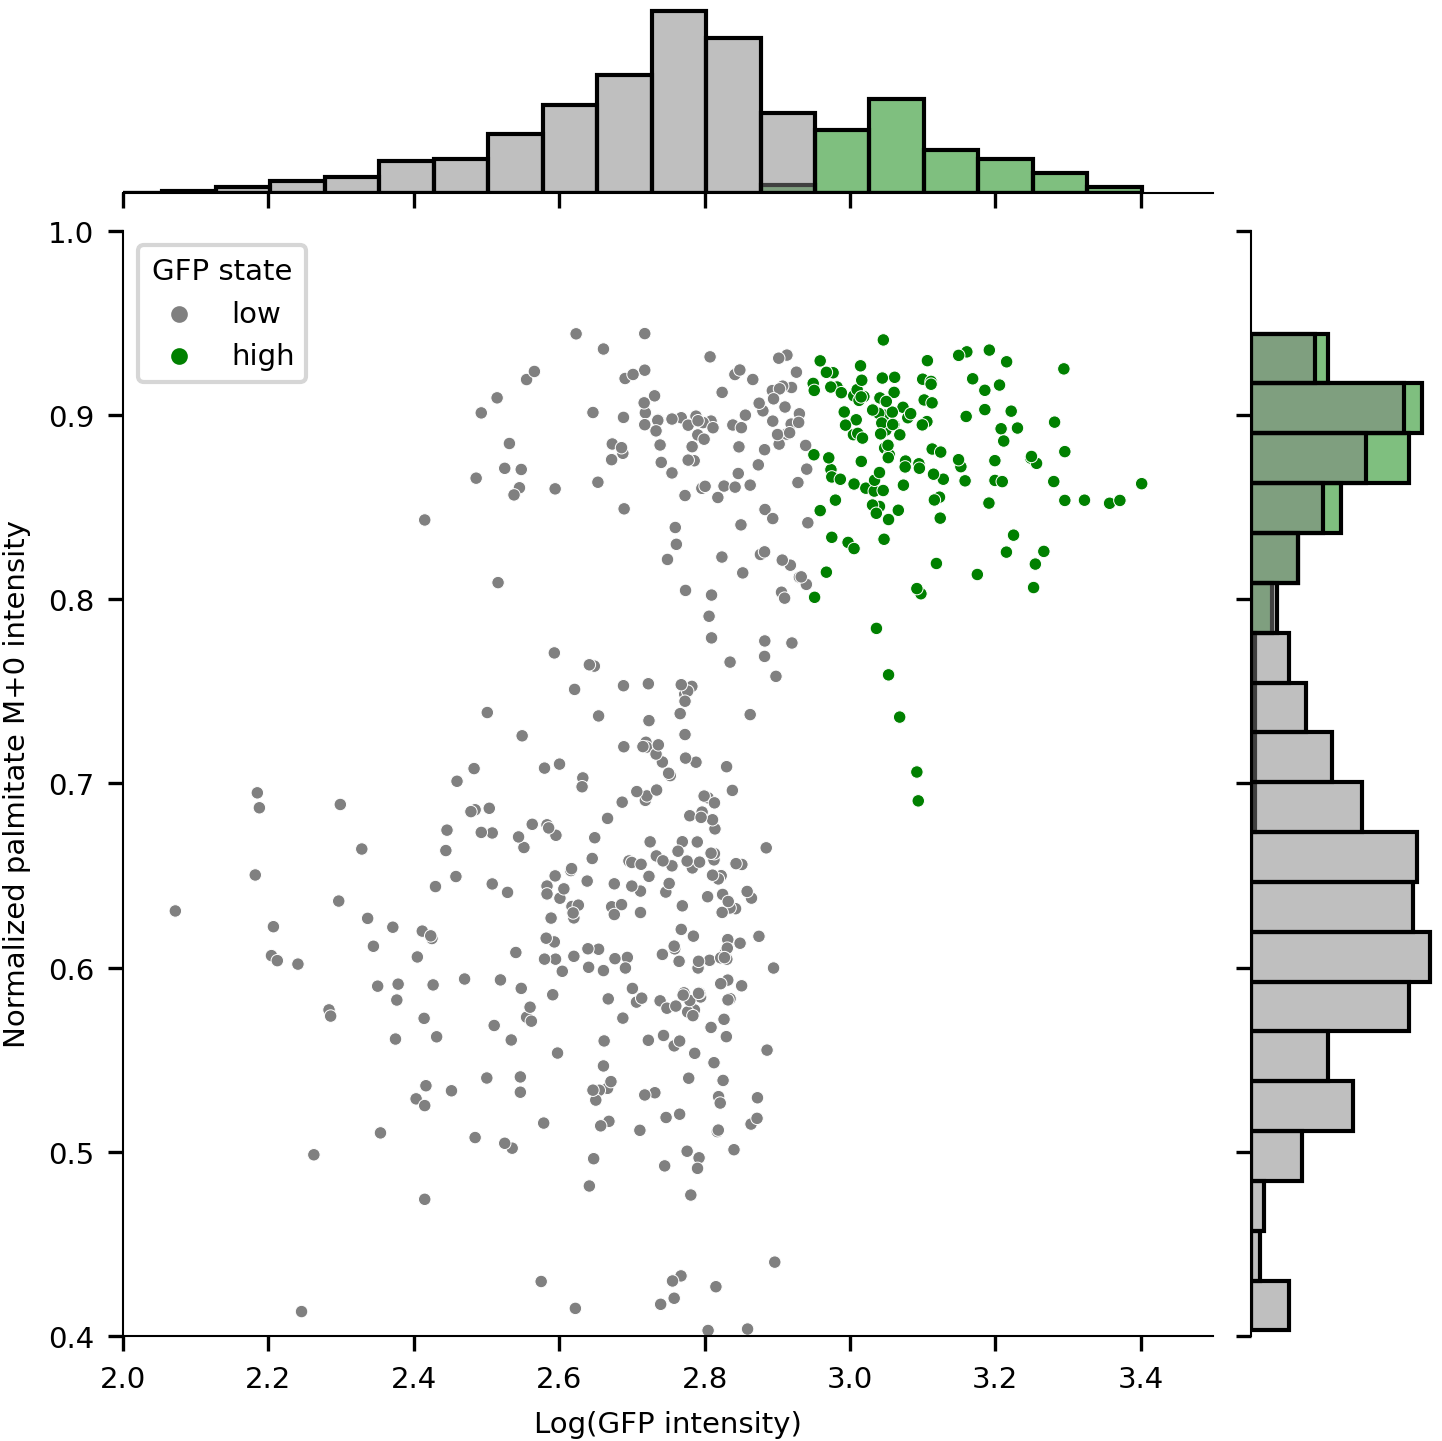

In [9]:
adata_mix =  adata[(adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")]
df = adata_mix[adata_mix.obs.slide == 3].obs
x_col = 'log_gfp'
y_col = 'C16H32O2-H_uptake'

# p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='condition', xlim=(2, 3.5), palette=sns.light_palette("seagreen", 2), hue_order=["Normoxia", "Hypoxia"])
p = sns.JointGrid(data=df, y=y_col, x=x_col, hue='assigned GFP class', ylim=(0.4, 1), xlim=(2, 3.5), palette=["grey", "green"], hue_order=["low", "high"], height=5)
p.plot_joint(sns.scatterplot)
p.plot_marginals(sns.histplot, bins=20)
p.set_axis_labels("Log(GFP intensity)", "Normalized palmitate M+0 intensity")
p.ax_joint.legend(title="GFP state")
plt.savefig(plots_path / ("panel_d.png"))
plt.savefig(plots_path / ("panel_d.svg"))

### Classification accuracy

Accuracy:  0.8333333333333334


/home/buglakova/anaconda3/envs/sciso_env_rep_final/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


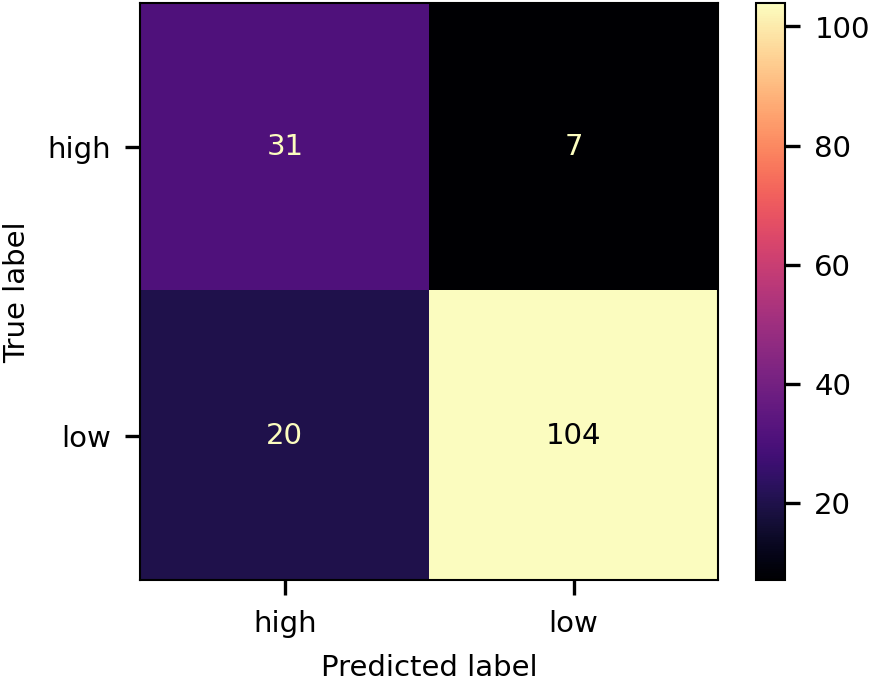

ROC AUC score:  0.8716044142614601


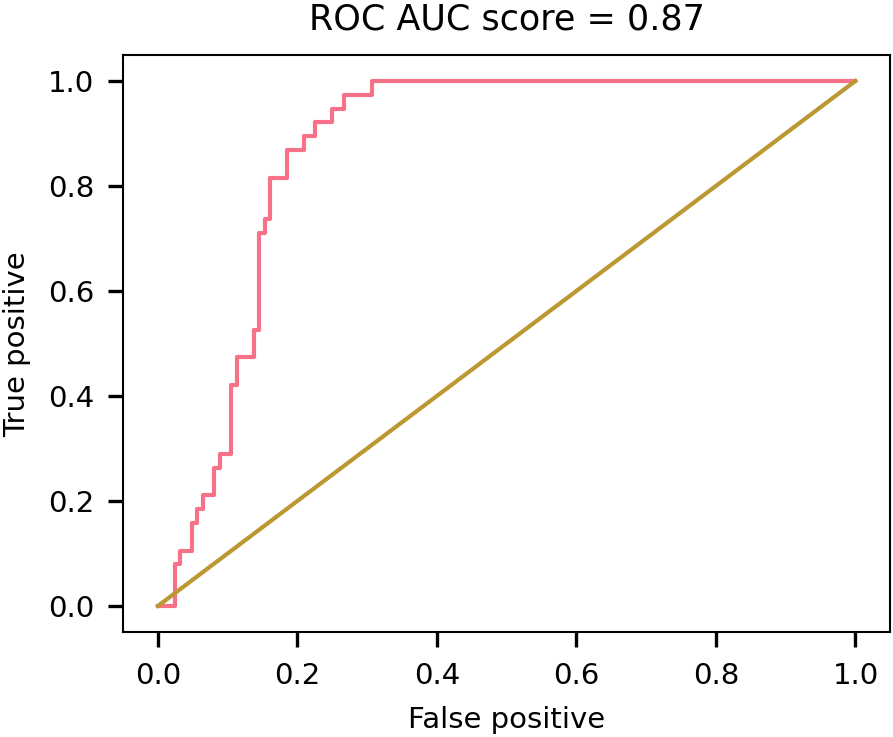

In [10]:
clf = train_classifier(adata_mix[adata_mix.obs.slide == 3], "mix", "high", plots_path, 'assigned GFP class')

## Panel e

### Set paths

In [11]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220322_AB_DKFZHypoxia") 
anndata_dir = data_dir / "anndata"
adata_am_path =anndata_dir / "hypoxia_adata_am_concat.h5ad"
adata_path = anndata_dir /"hypoxia_adata_concat_fit.h5ad"
bulk_data_path = data_dir / "IsoCorrectoR data.csv"

# Output
plots_path = Path(data_dir / "figure_images" / "fig_02")
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [12]:
adata = sc.read_h5ad(adata_path)

### Prediction of the condition, cells grown separately

### Prediction of the GFP state, cells grown separately

Accuracy:  1.0


/home/buglakova/anaconda3/envs/sciso_env_rep_final/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


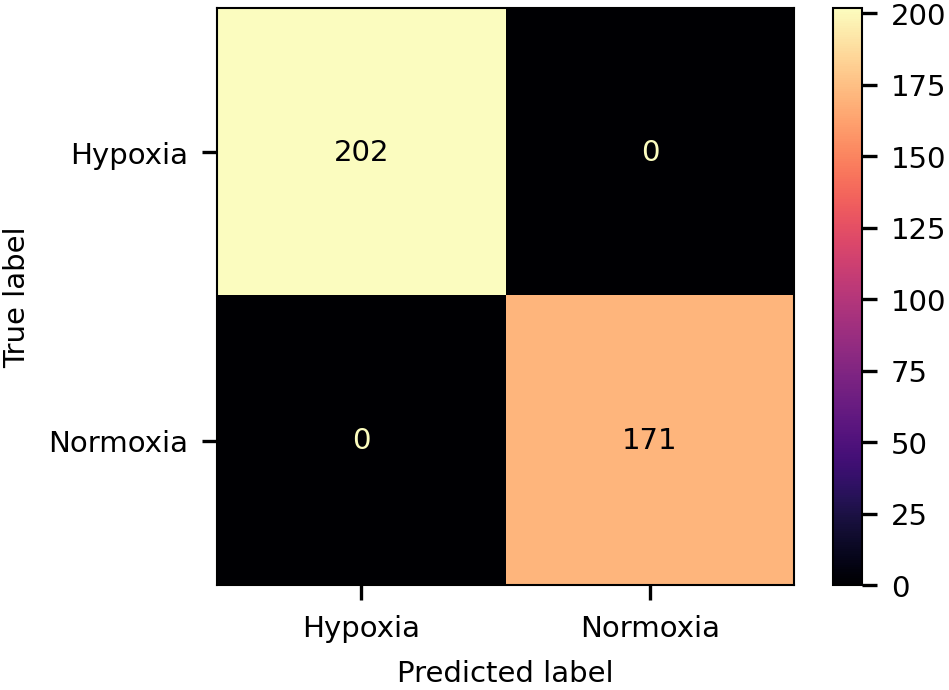

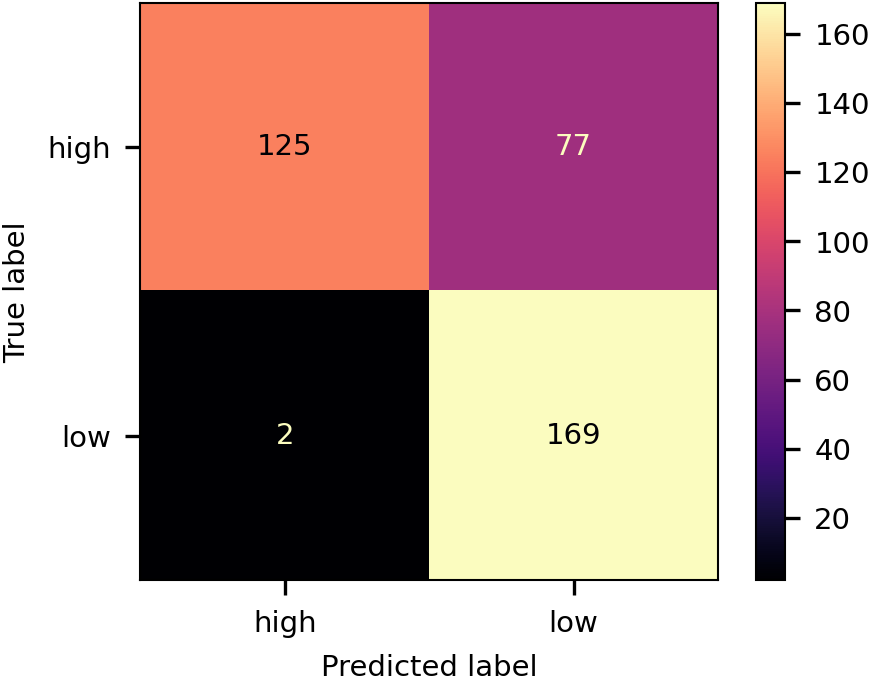

/home/buglakova/anaconda3/envs/sciso_env_rep_final/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ROC AUC score:  1.0


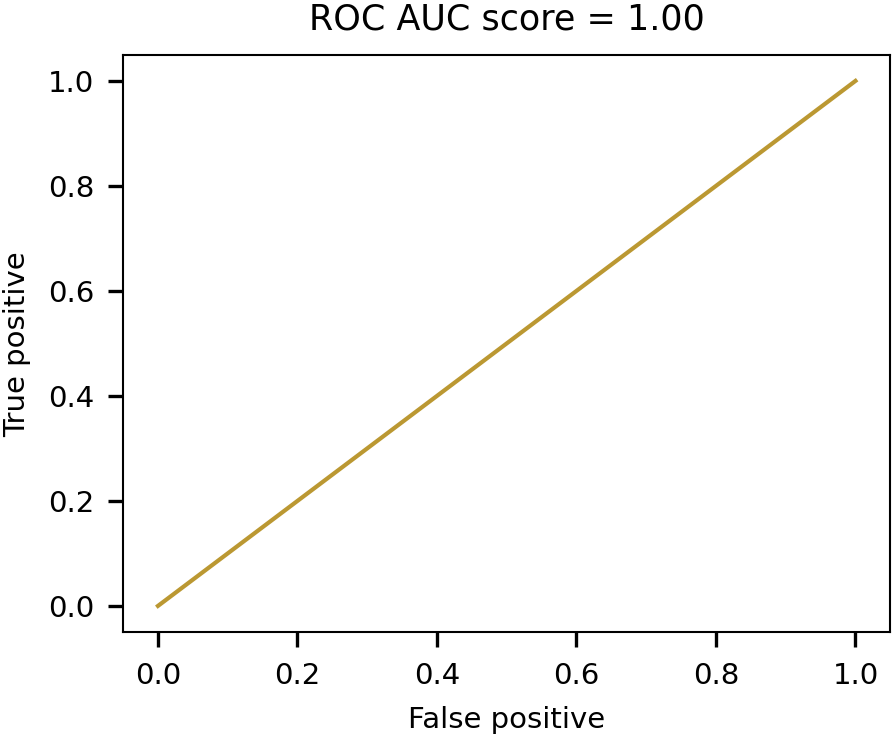

In [13]:
adata_separate =  adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & (adata.obs.slide == 3)]
clf = train_classifier_hypoxia_normoxia(adata_separate, "separate", "high", plots_path, 'condition', 'assigned GFP class')

### Prediction of the GFP state, mixture of cells in hypoxia and normoxia

In [14]:
adata_mix =  adata[(adata.obs.mixture == 1) & (adata.obs.growthConditions == "Labeled")]

In [15]:
label_dict = {"Normoxia": "low", "Hypoxia": "high"}
y_pred = [label_dict[pred] for pred in clf.predict(adata_mix.layers["corr_norm"])]

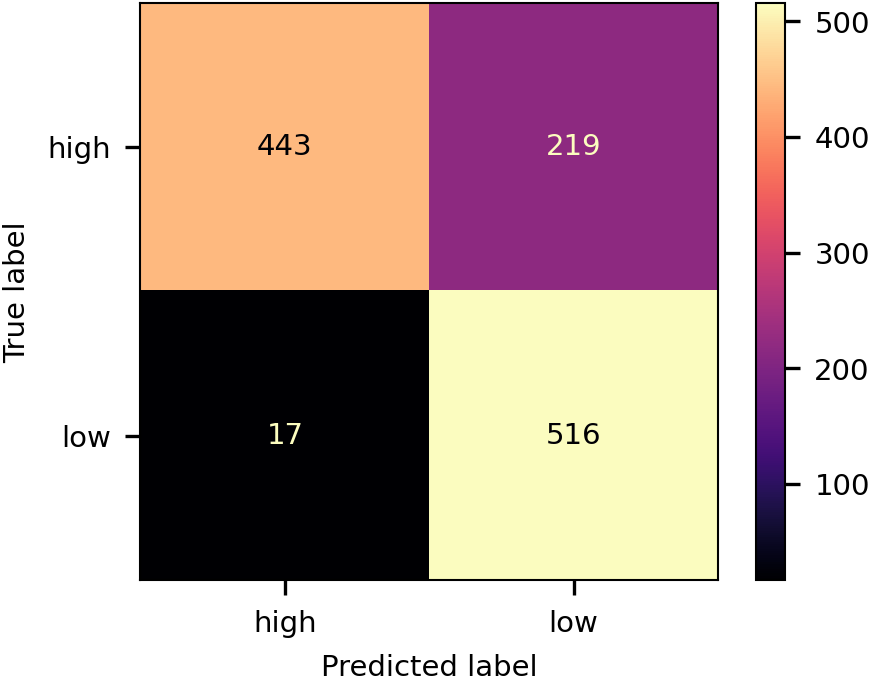

In [16]:
name_prefix = "mix"
confusion_matrix_col = 'assigned GFP class'

ConfusionMatrixDisplay.from_predictions(y_pred, adata_mix.obs['assigned GFP class'], cmap="magma")
plt.savefig(plots_path / f"{name_prefix}_{confusion_matrix_col}_confusion.png")
plt.savefig(plots_path / f"{name_prefix}_{confusion_matrix_col}_confusion.svg")
plt.show()

## Panel f

### Set paths

In [17]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220322_AB_DKFZHypoxia") 
anndata_dir = data_dir / "anndata"
adata_am_path =anndata_dir / "hypoxia_adata_am_concat.h5ad"
adata_path = anndata_dir /"hypoxia_adata_concat_fit.h5ad"
bulk_data_path = data_dir / "IsoCorrectoR data.csv"

# Output
plots_path = Path(data_dir / "figure_images" / "fig_02")
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [18]:
adata = sc.read_h5ad(adata_path)

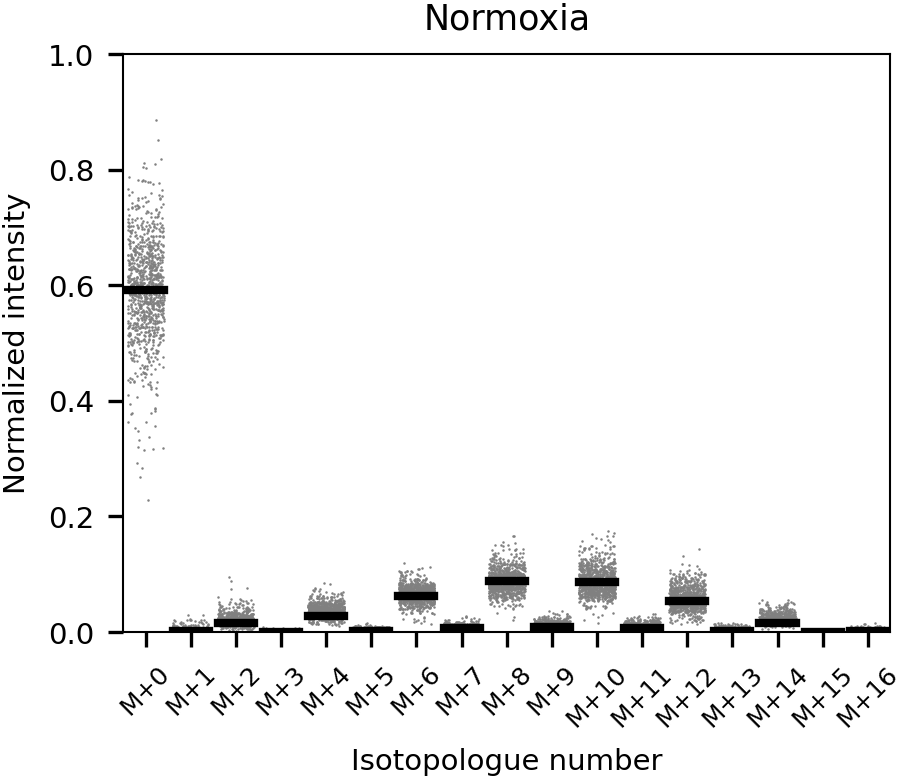

In [19]:
cond = "Normoxia"
ion = "C16H32O2-H"
adata_cond = adata[(adata.obs.condition == cond) & (adata.obs.growthConditions == "Labeled")]
ion_stripplot_bulk(adata_cond, ion, color="grey")
# plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
plt.ylabel("Normalized intensity")
plt.title(cond)
plt.savefig(plots_path / "panel_f_1_normoxia.png")
plt.savefig(plots_path / "panel_f_1_normoxia.svg")
plt.show()

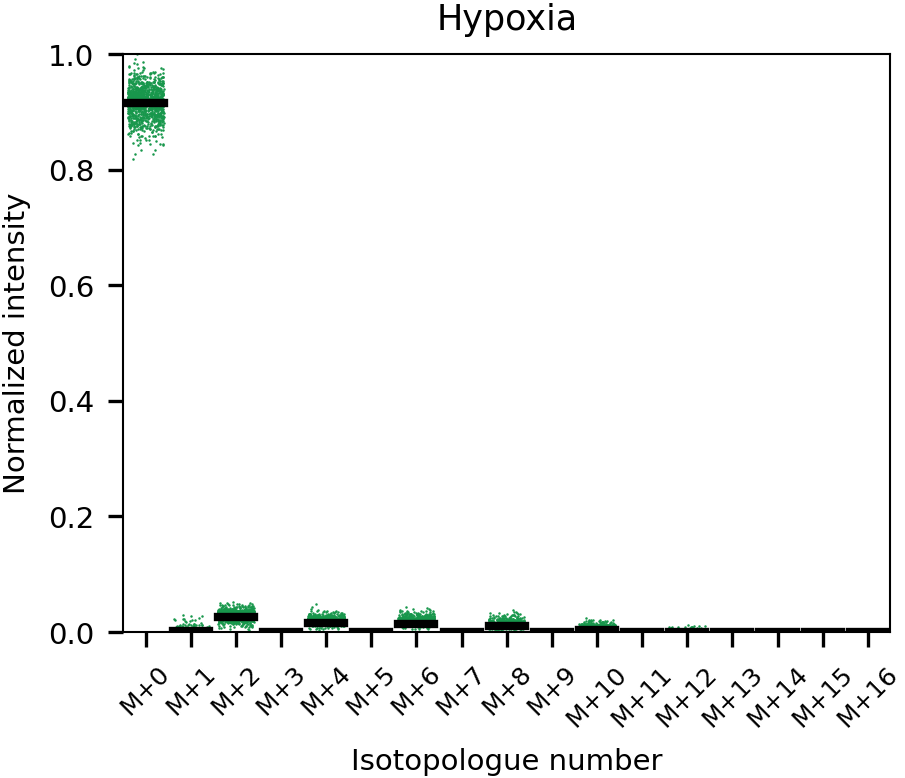

In [20]:
cond = "Hypoxia"
ion = "C16H32O2-H"
adata_cond = adata[(adata.obs.condition == cond) & (adata.obs.growthConditions == "Labeled")]
ion_stripplot_bulk(adata_cond, ion)
# plt.suptitle("Normalized corrected abundance of %s"%ion.unlabeled_annotation_id, y=1.05)
plt.ylabel("Normalized intensity")
plt.title(cond)
plt.savefig(plots_path / "panel_f_2_hypoxia.png")
plt.savefig(plots_path / "panel_f_2_hypoxia.svg")
plt.show()

### Bulk data

In [21]:
bulk_data = pd.read_csv(bulk_data_path)

In [22]:
bulk_data.head()

,Unnamed: 0,MTS_ctrl_1,MTS_ctrl_2,MTS_ctrl_3,MTS_acly3028_1,MTS_acly3028_2,MTS_acly3028_3,MTS_hypoxia_1,MTS_hypoxia_2,MTS_hypoxia_3
0,Palmitate_0,38.077855,36.757387,34.826834,70.333315,58.608115,58.854517,99.057916,96.171643,98.166784
1,Palmitate_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Palmitate_2,0.537852,0.539305,1.118554,5.165001,5.834627,5.865957,0.621867,2.089327,1.833216
3,Palmitate_3,0.095970,0.093583,0.000000,0.000000,0.296788,0.319105,0.000000,0.000000,0.000000
4,Palmitate_4,1.509815,1.547309,1.575163,5.238406,6.712772,6.674230,0.207426,0.539042,0.000000


In [23]:
bulk_data["fa"] = bulk_data["Unnamed: 0"].apply(lambda x: x.split("_")[0])
bulk_data["M"] = bulk_data["Unnamed: 0"].apply(lambda x: int(x.split("_")[1]))
# bulk_data_long = pd.melt(bulk_data, id_vars=["Unnamed: 0", "fa", "M"], value_vars = ["MTS_acly3028_1", "MTS_acly3028_2", "MTS_acly3028_3", "MTS_hypoxia_1", "MTS_hypoxia_2", "MTS_hypoxia_3"])
bulk_data_long = pd.melt(bulk_data, id_vars=["Unnamed: 0", "fa", "M"], value_vars = ["MTS_ctrl_1", "MTS_ctrl_2",	"MTS_ctrl_3", "MTS_hypoxia_1", "MTS_hypoxia_2", "MTS_hypoxia_3"])
bulk_data_long["condition"] = bulk_data_long["variable"].apply(lambda x: x.split("_")[1])
bulk_data_long["Normalized intensity"] = bulk_data_long["value"] * 0.01
bulk_data_long["condition"] = bulk_data_long["condition"].replace({"ctrl": "Normoxia", "hypoxia": "Hypoxia"})

In [24]:
bulk_data_long

,Unnamed: 0,fa,M,variable,value,condition,Normalized intensity
0,Palmitate_0,Palmitate,0,MTS_ctrl_1,38.077855,Normoxia,0.380779
1,Palmitate_1,Palmitate,1,MTS_ctrl_1,0.000000,Normoxia,0.000000
2,Palmitate_2,Palmitate,2,MTS_ctrl_1,0.537852,Normoxia,0.005379
3,Palmitate_3,Palmitate,3,MTS_ctrl_1,0.095970,Normoxia,0.000960
4,Palmitate_4,Palmitate,4,MTS_ctrl_1,1.509815,Normoxia,0.015098
...,...,...,...,...,...,...,...
211,Stearate_14,Stearate,14,MTS_hypoxia_3,0.000000,Hypoxia,0.000000
212,Stearate_15,Stearate,15,MTS_hypoxia_3,0.000000,Hypoxia,0.000000
213,Stearate_16,Stearate,16,MTS_hypoxia_3,0.000000,Hypoxia,0.000000
214,Stearate_17,Stearate,17,MTS_hypoxia_3,0.000000,Hypoxia,0.000000


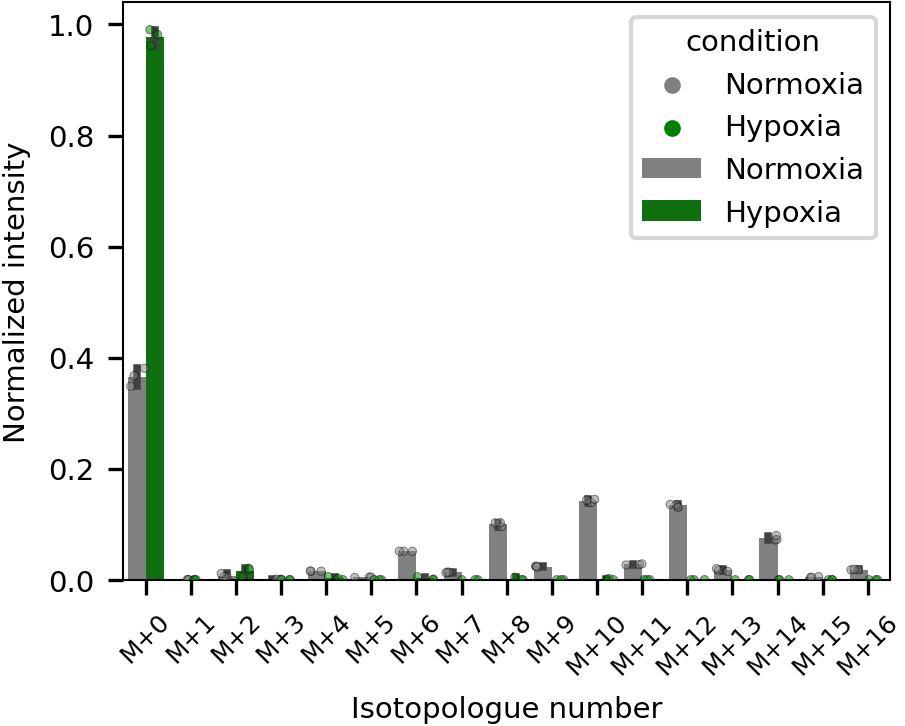

In [25]:
ax = sns.barplot(x="M", y="Normalized intensity", data=bulk_data_long[bulk_data_long["fa"] == "Palmitate"], hue="condition", palette=["grey", "green"], hue_order=["Normoxia", "Hypoxia"])
ax = sns.stripplot(x="M", y="Normalized intensity", data=bulk_data_long[bulk_data_long["fa"] == "Palmitate"], hue="condition", palette=["grey", "green"], hue_order=["Normoxia", "Hypoxia"], size=2, edgecolor="black", linewidth=0.2, jitter=0.4, alpha=0.5, dodge=True)

# xtick_pos = M
xtick_labels_m = ["M+%d"%d for d in range(17)]
ax.set_xticklabels(xtick_labels_m, fontsize=6)
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Isotopologue number")
ax.set_ylabel("Normalized intensity")

plt.savefig(plots_path / "panel_f_3_bulk.png")
plt.savefig(plots_path / "panel_f_3_bulk.svg")